In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
ad_df = pd.read_csv("advertising.csv")

In [3]:
# display the data
ad_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
ad_df.shape

(200, 4)

In [6]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


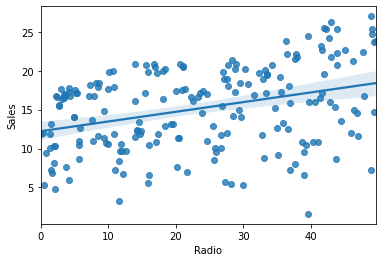

In [11]:
# regplots Radio
sns.regplot(x="Radio", y="Sales", data=ad_df)
plt.show()

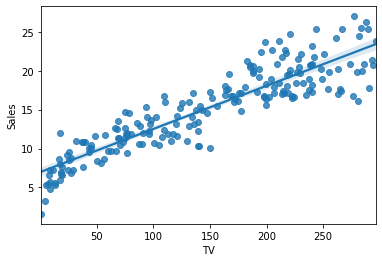

In [10]:
# regplots TV
sns.regplot(x="TV", y="Sales", data=ad_df)
plt.show()

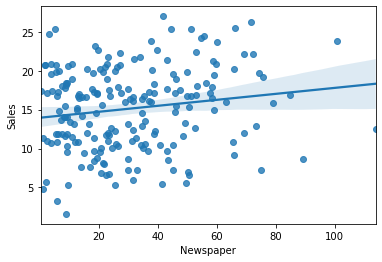

In [12]:
# regplots paper
sns.regplot(x="Newspaper", y="Sales", data=ad_df)
plt.show()

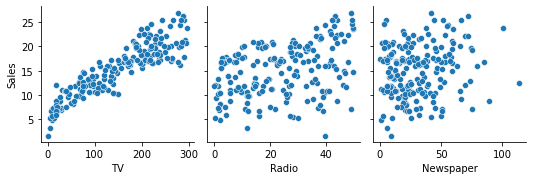

In [14]:
# pair plot
sns.pairplot(x_vars=["TV", "Radio", "Newspaper"],
            y_vars = "Sales", data=ad_df)

<AxesSubplot:>

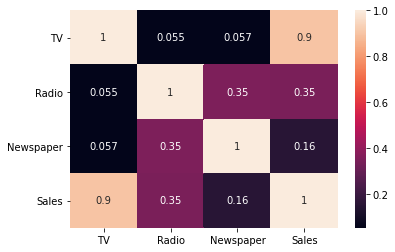

In [16]:
#heatmap
sns.heatmap(ad_df.corr(), annot=True)

In [20]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
X = ad_df["TV"]
y = ad_df["Sales"]

In [23]:
# Train Test split
X_train, X_test, Y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [24]:
# train model
# add constant for statsmodels library since it doesn't add an intercept on it's own
X_train_sm = sm.add_constant(X_train)

In [27]:
# fitting the model
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()

In [29]:
# find the parameters
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [30]:
# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.52e-52
Time:                        21:42:37   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

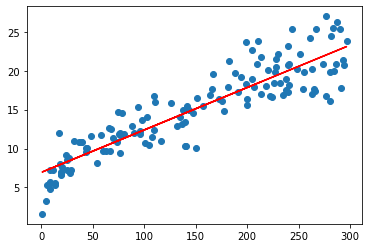

In [33]:
# scatter plot of x and y training data
plt.scatter(X_train, Y_train)
# plot of the model
plt.plot(X_train, 6.9487 + 0.0545 * X_train, 'r')

plt.show()

D:\Users\ranju\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

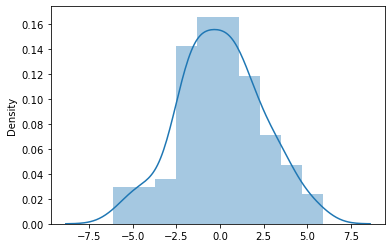

In [37]:
# residual analysis
# error_term is the difference between actual value and predicted value of dependant variable in this case sales
# error_term = f(Y_train, Y_train_pred)
sns.distplot(Y_train - (6.9487 + 0.0545 * X_train))

D:\Users\ranju\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


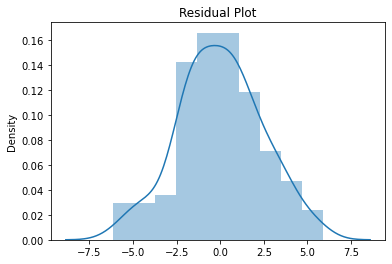

In [42]:
9# also generate using sm library lr model inbuilt predict
sns.distplot(Y_train - lr_model.predict(X_train_sm))
plt.title("Residual Plot")
plt.show()

# Since the residuals are folling a normal distribution with mean 0, the assumption is correct

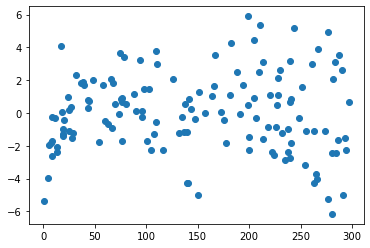

In [44]:
# Look for patterns in residuals (there should be no patterns)
plt.scatter(X_train, Y_train - lr_model.predict(X_train_sm))
plt.show()

In [51]:
# Evaluating the prediction
# Evaluate the model, r-squared, on the test set
X_test_sm = sm.add_constant(X_test)

# prediction on test data
Y_pred_test = lr_model.predict(X_test_sm)

In [53]:
# import metric methods from sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
r2 = r2_score(y_test, Y_pred_test)

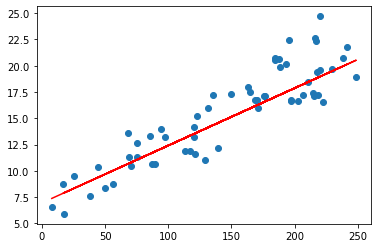

In [65]:
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred_test, 'r')

In [66]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [74]:
from sklearn.linear_model import LinearRegression

# Create an object of linear regression
# reshape X_train
lm = LinearRegression()
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [75]:
# Fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [77]:
# See parameters
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [80]:
# make predictions
y_train_pred = lm.predict(X_train.values.reshape(-1,1))
y_test_pred = lm.predict(X_test.values.reshape(-1,1))

In [83]:
# evaluate the model
print("train", r2_score(y_train, y_train_pred))
print("test", r2_score(y_test, y_test_pred))

train 0.8157933136480389
test 0.7921031601245662
